In [ ]:
import numpy as np
import data_center_helper as dch
import matplotlib.pyplot as plt

---
3.1 Show that if Aw = b, they y(t) = ...

---
3.2 Solve this least squares problem using the funtion numpy.linalg.lstsq.

In [15]:
A = dch.A
b = dch.b

result = np.linalg.lstsq(A, b, rcond=None)

coeficients = result[0]
coeficients

array([-0.00927821,  0.08309371, -0.03672704, ...,  0.01980595,
       -0.03057174, -0.01188614])

---
3.3 Evaluate the quality of the solution found on the test set.

MSE:  780.8984793523297


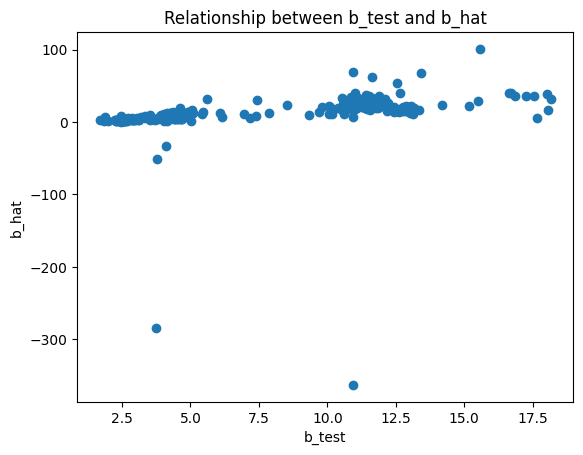

In [22]:
A_test = dch.A_test
b_test = dch.b_test

b_hat = np.dot(A_test, coeficients)

mse = np.mean((b_test - b_hat)**2)
print('MSE: ', mse)

plt.scatter(b_test, b_hat)
plt.xlabel('b_test')
plt.ylabel('b_hat')
plt.title('Relationship between b_test and b_hat')
plt.show()


---
3.4 In order to improve the generalization power of the model, we consider a $L_2$ regularization:

$$
\min_w \frac{1}{2} \| A w - b \|^2 + \frac{\lambda}{2} \| w \|^2
$$

where $\lambda = 100$. Solve this problem and compare the test mean square error with the unregularized one.

In [36]:
lambda_ = 100
coeficients_l2 = np.linalg.solve(np.dot(A.T, A) + lambda_ * np.eye(A.shape[1]), np.dot(A.T, b))

b_hat_l2 = np.dot(A_test, coeficients_l2)

mse_l2 = np.mean((b_test - b_hat_l2)**2)
print('MSE: ', mse_l2)

MSE:  301.05482809422307


---
3.5 Calculate the gradient of f1 : w -> $ \frac{1}{2} \| A w - b \|^2 + \frac{\lambda}{2} \| w \|^2$

In [37]:
f1 = 0.5 * np.linalg.norm(A.dot(coeficients_l2) - b) ** 2 + (lambda_/2) * np.linalg.norm(coeficients_l2) ** 2
print('f1: ', f1)
gradient = np.gradient(f1)
gradient

[]